<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week10.do.txt --no_mako -->
<!-- dom:TITLE: March 18-22, 2024: Quantum Computing, Quantum Machine Learning and Quantum Information Theories -->

# March 18-22, 2024: Quantum Computing, Quantum Machine Learning and Quantum Information Theories
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University

Date: **Week of March 18-22**

## Plans for the week of March 18-22, 2024

1. Discussion of project 1 and possible paths for project 2

2. Start discussion of discrete Fourier transforms as prelude to Quantum Fourier transforms, basic mathematical expressions

3. Reading recommendation Hundt, Quantum Computing for Programmers, sections 6.1-6.4 on QFT.

4. [Video of lecture](https://youtu.be/kR-4qqtFyxQ)

5. [Whiteboard notes](https://github.com/CompPhysics/QuantumComputingMachineLearning/blob/gh-pages/doc/HandWrittenNotes/2024/NotesMarch20.pdf)

## Possible paths for project 2

* Implement QFTs  and study the phase estimation algorithm and eventually Shor's algorithm for factorization of numbers.

* Study other algorithms

a. Deutsch-Jozsa algorithm: Determine if a function is constant or balance using the fewest number of queries.

b. Shor's algorithm : Factorize integers efficiently

c. Other algorithms

* Study the solution of quantum mechanical eigenvalue problems with systems from atomic/molecular physics and quantum chemistry

* Quantum machine learning projects

* Other paths

For project 2, in order to be time efficient, you can use software like Qiskit, Pennylane, qBraid and/or other

## Overarching motivation

We will start with discrete Fourier transforms (DFT).  There are many
motivations for the DFT. For those of you familiar with signal
processing, harmonic oscillations, and many other areas of
applications, Fourier transforms are almost standard kitchen
items. For those of you who have studied quantum theory, you have
probably met Fourier transforms when studying Heisenberg's uncertainty
relation between momentum and position.

## A familiar case

For problems with so-called harmonic oscillations, given by for example the following differential equation

$$
m\frac{d^2x}{dt^2}+\eta\frac{dx}{dt}+x(t)=f(t),
$$

where $f(t)$ is an applied external force acting on the system (often
called a driving force), one can use the theory of Fourier
transformations to find the solutions of this type of equations.

## Several driving forces

If one has several driving forces, $f(t)=\sum_n f_n(t)$, one can find
the particular solution $x_{pn}(t)$ to the above differential equation for each $f_n$. The particular
solution for the entire driving force is then given by a series like

$$
x_p(t)=\sum_nx_{pn}(t).
$$

This is known as the principle of superposition. It only applies when
the homogenous equation is linear. 
Superposition is especially useful when $f(t)$ can be written
as a sum of sinusoidal terms, because the solutions for each
sinusoidal (sine or cosine)  term is analytic.

## Periodicity

Driving forces are often periodic, even when they are not
sinusoidal. Periodicity implies that for some time $t$ our function repeats itself periodically after a period $T$, that is

$$
f(t+\tau)=f(t).
$$

One example of a non-sinusoidal periodic force is a square wave. Many
components in electric circuits are non-linear, for example diodes. This 
makes many wave forms non-sinusoidal even when the circuits are being
driven by purely sinusoidal sources.

## Simple Code Example

The code here shows a typical example of such a square wave generated
using the functionality included in the **scipy** Python package. We
have used a period of $\tau=0.2$.

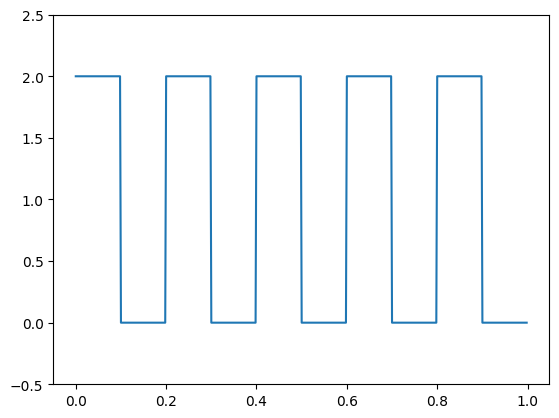

In [1]:
%matplotlib inline

import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

# number of points                                                                                       
n = 500
# start and final times                                                                                  
t0 = 0.0
tn = 1.0
# Period                                                                                                 
t = np.linspace(t0, tn, n, endpoint=False)
SqrSignal = np.zeros(n)
SqrSignal = 1.0+signal.square(2*np.pi*5*t)
plt.plot(t, SqrSignal)
plt.ylim(-0.5, 2.5)
plt.show()

## Continuous Fourier transforms and the principle of Superposition

It was Fourier's idea to expand a continuous and periodic function $f(t)$ in terms of sums sinus and cosinus ordered functions (we will use exponentials however)
as

$$
f(t) = \sum_{k=1}^{n}a_k\sin{(2\pi kt+\phi_n)},
$$

with $\phi_n$ being a constant phase. The function $f$ is assumed to be bounded in order to be able to define properly the error in truncating the sum
over $n$, that is

$$
\int_a^b dt \vert f(t)\vert^2 \le M < \infty.
$$

Below we discuss how to find the coefficients $a_n$.

## Rewriting in terms of sines and cosines

It is common to rewrite the above sum in terms of sines and cosines and to add a complex constant $a_0$. This gives us

$$
f(t) = \frac{a_0}{2}+ \sum_{k=1}^{n}\left(a_k\cos{(2\pi kt)}+b_n\sin{(2\pi kt)}\right).
$$

Using the standard trigonometric relations

$$
\begin{align*}
\cos{t} = \frac{\exp{\imath t}+\exp{-\imath t}}{2} & \hspace{0.5cm} \sin{t} = \frac{\exp{\imath t}-\exp{-\imath t}}{2\imath}.
\end{align*}
$$

## Exponential expression

We can rewrite the Fourier expansion as

$$
f(t) =\sum_{k=-n}^{n}c_{k}\exp{(2\pi\imath kt)},
$$

with $c_0=a_0/2$. The coefficients $c_k$ are complex and satisfy $c_{-k}=c_k^*$.
The constant $c_{0}=c_0^*$ is a real number.

The above sum can also be rewritten in terms of the real part of the exponetials as

$$
f(t) =2\mathrm{Re}\left(\sum_{k=0}^{n}c_{k}\exp{(2\pi\imath kt} \right),
$$

where we used that $c_{-k}=c_k^*$. We leave it as an exercise to the reader to show the latter expression.

How do we determine the coefficients $c_k$?

## Determining $c_k$

Let us assume that we have a periodic function $f(t)$

$$
f(t) =\sum_{k=-n}^{n}c_{k}\exp{(2\pi\imath kt)},
$$

and we select the coefficient $c_l$, and multiply the l.h.s and r.h.s. with $\exp{(-2\pi\imath lt)}$, and isolate the $c_l$ terms

$$
c_l=f(t)\exp{(-2\pi\imath lt)}-\sum_{k=-n, k\ne l}^{n}c_{k}\exp{(2\pi\imath (k-l)t)}.
$$

## Integrating both sides

Then we integrate both sides (note we have assumed a period of one) from $0$ to $1$. This gives

$$
c_l=\int_0^1 dtf(t)\exp{(-2\pi\imath lt)},
$$

since the terms with the sum is zero.  We leave again this derivation as an exercise to the dedicated reader.
If the function $f$ is real ($t$ nd $dt$ are real), then $c_l^*=c_{-l}$.
The coefficients $c_n$ are normally called the Fourier coefficients and it is common to relabel them in terms of the function $f$ as

$$
\hat{f}(k)=\int_0^1 dt f(t)\exp{(-2\pi\imath kt)}.
$$

## Independence of interval length

In the discussions and equations above, we have assumed that the
integration interval has a length of one, that is a period of length one. It is easy to change this
length and as we show below, if we integrate from say $a$ to $a+1$, this is the same as integrating over an interval of length $1$.

To show this, we need also to recall that our function $f(t)$ is assumed to be periodic, that is we need to satisfy

$$
f(a+1)=f(a).
$$

Later we will generalize this to a period of arbitrary length.

Assume that $a$ is any number and taking the derivative of the integral with respect to $a$, we have

$$
\frac{d}{da}\left[\int_a^{a+1} dt f(t)\exp{(-2\pi\imath kt)}\right].
$$

## Writing out the various terms

From the last equation we have then

$$
\exp{(-2\pi\imath ka)}\exp{(-2\pi\imath k)}f(a+1)-\exp{(-2\pi\imath ka)}f(a)=0,
$$

where we used the periodicity  $f(a+1)=f(a)$ and that $\exp{(-2\pi\imath k)}=1$ since $k$ is an integer.
This shows that the expression for $\hat{f}$ is independent of $a$. A common instance is

$$
\hat{f}(k)=\int_{-\frac{1}{2}}^{\frac{1}{2}} dt f(t)\exp{(-2\pi\imath kt)}.
$$

## Changing period

What if the period is not equal to one? Assume we are working with a
function $f(t)$ whose period is $T$. We can then define a function
$g(t)$ with period one as

$$
g(t) = f(Tt),
$$

that is

$$
g(t) =\sum_{k=-n}^{n}c_{n}\exp{(2\pi\imath kt)},
$$

and introducing the variable $s=Tt$ we have $g(t)=f(s)$ we have

$$
f(s) = g(t)=\sum_{k=-n}^{n}c_{n}\exp{(2\pi\imath kt)}=\sum_{k=-n}^{n}c_{k}\exp{(2\pi\imath ks/T)}.
$$

## Harmonics

The so-called harmonics are now defined as $\exp{(2\pi\imath ks/T)}$.
We have

$$
\hat{g}(k)=\int_0^1 dt g(t)\exp{(-2\pi\imath kt)},
$$

and using $s=Tt$ we have

$$
\hat{g}(k)=\int_0^1 dt g(t)\exp{(-2\pi\imath kt)}=\frac{1}{T}\int_0^T ds f(s)\exp{(-2\pi\imath ks/T)}.
$$

For a period $T$ we have thus the general expression for the Fourier transform

$$
\hat{f}(k)=c_k=\frac{1}{T}\int_0^T dt f(t)\exp{(-2\pi\imath kt/T)}.
$$

## Typical interval

An often used choice of interval is

$$
\hat{f}(k)=c_k=\frac{1}{T}\int_{-T/2}^{T/2} dt f(t)\exp{(-2\pi\imath kt/T)},
$$

and a common choice for the harmonics is $(1/\sqrt{T})\exp{(2\pi\imath kt/T)}$.

As a small addendum, if the signal (function) $f(t)$ is real and even one has $f(-t)=f(t)$. If $f$ is an even function, then $\hat{f}$ is also an even function which leads to $\hat{f}(-k)=\hat{f}(k)$.

## Sinusoidal example
For the sinusoidal example the
period is $T=2\pi/\omega$. However, higher harmonics can also
satisfy the periodicity requirement. In general, any force that
satisfies the periodicity requirement can be expressed as a sum over
harmonics,

$$
f(t)=\frac{a_0}{2}+\sum_{n>0} a_n\cos(2n\pi t/T)+b_n\sin(2n\pi t/T).
$$

## Square well example

In the code discussed earlier, we used a square well as a our
example. If we assume our period has length $1$, we can define the
square well function $f(t)$ as

$$
f(t)=\left\{\begin{array}{cc} 1 & 0 \le t \le \frac{1}{2} \\
                              -1 & \frac{1}{2} < t \le 1\end{array}\right.
$$

The zeroth coefficient $a_0$ is zero since it is the average of the function $f(t)$ over the intergration domain $t\in [0,1]$.

## The coefficients

We find that the other coefficients are

$$
\hat{f}(n)=c_n=\int_0^1 dt f(t)\exp{(-2\pi\imath nt)}=\frac{1}{\imath\pi n}\left(1-\exp{-\imath\pi n}\right).
$$

We note that $(1-\exp{-\imath\pi n})$ is zero when $n$ is an even
number and $2$ when $n$ is an odd number. We can then combine the
positive and negative values of $n$ using

$$
\exp{(2\pi\imath nt)}-\exp{(-2\pi\imath nt)}=2\imath \sin{(2\pi nt)},
$$

and we have

$$
f(t)=\frac{4}{\pi}\sum_{k=0}^{\infty}\frac{1}{2k+1}\sin{(2\pi(2k+1)t)}.
$$

## Code for the  Fourier Transforms

The code here uses the Fourier series applied to a 
square wave signal. The code here
visualizes the various approximations given by Fourier series compared
with a square wave with period $T=0.2$ (dimensionless time), width $0.1$ and max value of the force $F=2$. We
see that when we increase the number of components in the Fourier
series, the Fourier series approximation gets closer and closer to the
square wave signal.

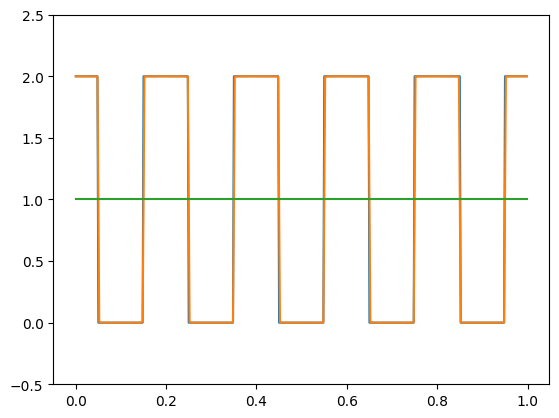

In [26]:
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

# number of points                                                                                       
n = 500
# start and final times                                                                                  
t0 = 0.0
tn = 1.0
# Period                                                                                                 
T =0.2
# Max value of square signal                                                                             
Fmax= 2.0
# Width of signal   
Width = 0.1
t = np.linspace(t0, tn, n, endpoint=False)
SqrSignal = np.zeros(n)
FourierSeriesSignal = np.zeros(n)
SqrSignal = 1.0+signal.square(2*np.pi*5*t+np.pi*Width/T)
a0 = Fmax*Width/T
FourierSeriesSignal = a0
Own = a0

Factor = 2.0*Fmax/np.pi
for i in range(1,2500):
    #print(FourierSeriesSignal)
    FourierSeriesSignal += Factor/(i)*np.sin(np.pi*i*Width/T)*np.cos(i*t*2*np.pi/T)
    Own += 4/np.pi *1/(2*i+1) *np.sin(2*np.pi*(2*i+1)*t/0.2)
    
plt.plot(t, SqrSignal)
plt.plot(t, FourierSeriesSignal)
plt.plot(t, Own)
plt.ylim(-0.5, 2.5)
plt.show()

### Fourier transforms and convolution

We can use Fourier transforms in our studies of convolution as
well. To see this, assume we have two functions $f$ and $g$ and their
corresponding Fourier transforms $\hat{f}$ and $\hat{g}$. We remind
the reader that the Fourier transform reads (say for the function $f$)

$$
\hat{f}(y)=\boldsymbol{F}[f(y)]=\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \exp{-i\omega y} f(\omega),
$$

and similarly we have

$$
\hat{g}(y)=\boldsymbol{F}[g(y)]=\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \exp{-i\omega y} g(\omega).
$$

## Inverse Fourier transform

The inverse Fourier transform is given by

$$
\boldsymbol{F}^{-1}[g(y)]=\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \exp{i\omega y} g(\omega).
$$

The inverse Fourier transform of the product of the two functions $\hat{f}\hat{g}$ can be written as

$$
\boldsymbol{F}^{-1}[(\hat{f}\hat{g})(x)]=\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \exp{i\omega x} \hat{f}(\omega)\hat{g}(\omega).
$$

## Rewriting
We can rewrite the latter as

$$
\boldsymbol{F}^{-1}[(\hat{f}\hat{g})(x)]=\int_{-\infty}^{\infty} d\omega \exp{i\omega x} \hat{f}(\omega)\left[\frac{1}{2\pi}\int_{-\infty}^{\infty}g(y)dy \exp{-i\omega y}\right]=\frac{1}{2\pi}\int_{-\infty}^{\infty}dy g(y)\int_{-\infty}^{\infty} d\omega \hat{f}(\omega) \exp{i\omega(x- y)},
$$

which is simply

$$
\boldsymbol{F}^{-1}[(\hat{f}\hat{g})(x)]=\int_{-\infty}^{\infty}dy g(y)f(x-y)=(f*g)(x),
$$

the convolution of the functions $f$ and $g$.

## Transforming to discrete variables

In the Fourier transform $c_n$ is transformed from a dicrete variable
to a continuous one as $T \rightarrow \infty$. We then replace $c_n$ with
$f(k)dk$ and let $n/T \rightarrow k$, and the sum is changed to an
integral. This gives

$$
f(x) = \int_{-\infty}^{\infty}dkF(k) \exp{i(2\pi kx)}
$$

and

$$
F(k) = \int_{-\infty}^{\infty}dxf(x) \exp{-i(2\pi kx)}
$$

One way to interpret the Fourier transform is then as a transformation from one basis to another.

## Discrete Fourier transform

We change notation by replacing $t$ with $x$.

Next we make another generalization by having a discrete function,
that is $f(x) \rightarrow f(x_k)$ with $x_k = k\Delta x$ for $k=0,\dots, N-1$. This leads to the sums

$$
f_x = \frac{1}{n} \sum_{k=0}^{n-1}F_k \exp{i(2\pi kx)/n},
$$

and

$$
F_k = \sum_{x=0}^{n-1}f_x \exp{-i(2\pi kx)/n}.
$$

Although we have used functions here, this could also be a set of
numbers.

## Simple example

As an example we can have a set of complex numbers
$\{x_0,\dots,x_{n-1}\}$ with fixed length $n$, we can Fourier
transform this as

$$
y_k = \frac{1}{\sqrt{n}} \sum_{j=0}^{n-1} x_j \exp{i(2\pi jk)/n},
$$

leading to a new set of complex numbers $\{ y_0,\dots,y_{n-1}\}$.

## Discrete Fourier Transformations

Consider two sets of complex numbers $x_k$ and $y_k$ with
$k=0,1,\dots,n-1$ entries. The discrete Fourier transform is defined
as

$$
y_k = \frac{1}{\sqrt{n}} \sum_{j=0}^{n-1} \exp{(\frac{2\pi\imath jk}{n})} x_j.
$$

As an example, assume $x_0=1$ and $x_1=1$. We can then use the above expression to find $y_0$ and $y_1$.

With the above formula we get then

$$
\begin{align*}
y_0 &= \frac{1}{\sqrt{2}} \left( \exp{(\frac{2\pi\imath 0\times 1}{2})} \times 1+\exp{(\frac{2\pi\imath 0\times 1}{2})}\times 2\right)\\
& =\frac{1}{\sqrt{2}}(1+2)=\frac{3}{\sqrt{2}},
\end{align*}
$$

and

$$
\begin{align*}
y_1 &= \frac{1}{\sqrt{2}} \left( \exp{(\frac{2\pi\imath 0\times 1}{2})} \times 1+\exp{(\frac{2\pi\imath 1\times 1}{2})}\times 2\right)=\\
& =\frac{1}{\sqrt{2}}(1+2\exp{(\pi\imath)})=-\frac{1}{\sqrt{2}}.
\end{align*}
$$

## More details on Discrete Fourier transforms

Suppose that we have a vector $f$ of $n$ complex numbers, $f_{k}, k
\in\{0,1, \ldots, n-1\}$. Then the discrete Fourier transform (DFT) is
a map from these $n$ complex numbers to $n$ complex numbers, the
Fourier transformed coefficients $\tilde{f}_{j}$, given by

$$
\tilde{f}_{j}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{-j k} f_{k}
$$

where $\omega=\exp \left(\frac{2 \pi i}{N}\right)$.

## Inverse DFT

The inverse DFT is given by

$$
f_{j}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{j k} \tilde{f}_{k}
$$

To see this consider how the basis vectors transform. If $f_{k}^{l}=\delta_{k, l}$, then

$$
\tilde{f}_{j}^{l}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{-j k} \delta_{k, l}=\frac{1}{\sqrt{n}} \omega^{-j l}
$$

## Orthonormality

These DFT vectors are orthonormal, that is

$$
\sum_{j=0}^{n-1} \tilde{f}^{l}{ }_{j}^{*} \tilde{f}_{j}^{m}=\frac{1}{n} \sum_{j=0}^{n-1} \omega^{j l} \omega^{-j m}=\frac{1}{N} \sum_{j=0}^{n-1} \omega^{j(l-m)}
$$

This last sum can be evaluated as a geometric series, but beware of the $(l-m)=0$ term, and yields

$$
\sum_{j=0}^{n-1} \tilde{f}^{l}{ }_{j}^{*} \tilde{f}_{j}^{m}=\delta_{l, m}
$$

## Inverse transform

From this we can check that the inverse DFT does indeed perform the inverse transform:

$$
f_{j}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{j k} \tilde{f}_{k}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{j k} \frac{1}{\sqrt{n}} \sum_{l=0}^{n-1} \omega^{-l k} f_{l}=\frac{1}{n} \sum_{k, l=0}^{n-1} \omega^{(j-l) k} f_{l}=\sum_{l=0}^{n-1} \delta_{j, l} f_{l}=f_{j}
$$

## Plans for the week of April 1-5

1. Finalize our discussion of DFTs and introduce QFTs

2. Set up calculations of QFTs